# Phase 3: Target Market Study

This notebook represents the third phase of the sales analysis project. In this step, we group countries based on their sales volume and number of unique customers, then visualize the results using a professional scatter plot. This analysis helps identify key markets for strategic decision-making.

## Objectives
- Exclude sales data from the United Kingdom.
- Calculate total sales and unique customers per country.
- Classify countries into four groups based on sales and customer metrics.
- Create an insightful scatter plot to analyze market distribution.

## Step 1: Import Libraries

Load essential Python libraries for data manipulation, visualization, and logging.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

## Step 2: Load Preprocessed Dataset

Read the preprocessed sales data from `preprocessed_sales.csv` into a DataFrame. This dataset was cleaned in Phase 1 to remove inconsistencies.

In [2]:
try:
    df = pd.read_csv('preprocessed_sales.csv')
    logger.info(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    logger.error("File 'preprocessed_sales.csv' not found.")
    raise
except Exception as e:
    logger.error(f"Error loading dataset: {e}")
    raise

df.head()

2025-04-10 12:30:48,663 - INFO - Dataset loaded successfully. Shape: (400916, 8)


,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Step 3: Data Preparation

Calculate total sales per transaction and aggregate sales and customer counts by country, excluding the United Kingdom.

In [3]:
# Calculate total price per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate sales and customer counts by country
sales_amount_df = df.groupby('Country')['TotalPrice'].sum().reset_index(name='SalesAmount')
customer_count_df = df.groupby('Country')['CustomerId'].nunique().reset_index(name='CustomerCount')

# Merge and exclude United Kingdom
market_study_df = sales_amount_df.merge(customer_count_df, on='Country')
market_study_df = market_study_df[market_study_df['Country'] != 'United Kingdom']
logger.info(f"Data prepared. Countries after excluding UK: {len(market_study_df)}")
market_study_df.head()

2025-04-10 12:30:52,201 - INFO - Data prepared. Countries after excluding UK: 36


,Country,SalesAmount,CustomerCount
0,Australia,31446.80,15
1,Austria,13414.33,10
2,Bahrain,805.97,2
3,Belgium,24537.58,17
4,Brazil,268.27,1


## Step 4: Classify Countries into Groups

Group countries based on sales amount (`SA`) and customer count (`CC`) using the third quartile (`qSA` and `qCC`) as thresholds.

### Group Definitions
| **Group** | **Name**                   | **Condition**                  | **Color** |
|-----------|----------------------------|--------------------------------|-----------|
| 1         | Highest customer & revenue | `SA > qSA` and `CC > qCC`     | `red`     |
| 2         | High customer & low revenue| `SA < qSA` and `CC > qCC`     | `blue`    |
| 3         | High revenue & low customer| `SA > qSA` and `CC < qCC`     | `green`   |
| 4         | Low customer & revenue     | `SA < qSA` and `CC < qCC`     | `cyan`    |

In [4]:
# Calculate third quartiles
qSA = market_study_df['SalesAmount'].quantile(0.75)
qCC = market_study_df['CustomerCount'].quantile(0.75)

# Define grouping function
def classify_country(row):
    sa, cc = row['SalesAmount'], row['CustomerCount']
    if sa > qSA and cc > qCC:
        return 1  # Highest customer & revenue
    elif sa < qSA and cc > qCC:
        return 2  # High customer & low revenue
    elif sa > qSA and cc < qCC:
        return 3  # High revenue & low customer
    else:
        return 4  # Low customer & revenue

# Apply classification
market_study_df['Group'] = market_study_df.apply(classify_country, axis=1)
logger.info(f"Countries classified. Group counts: {market_study_df['Group'].value_counts().to_dict()}")
market_study_df.head()

2025-04-10 12:31:00,985 - INFO - Countries classified. Group counts: {4: 25, 1: 7, 2: 2, 3: 2}


,Country,SalesAmount,CustomerCount,Group
0,Australia,31446.80,15,1
1,Austria,13414.33,10,4
2,Bahrain,805.97,2,4
3,Belgium,24537.58,17,2
4,Brazil,268.27,1,4


## Step 5: Visualize Market Distribution

Create a professional scatter plot to visualize countries by sales amount and customer count, with groups differentiated by color. Highlight France, Spain, and Netherlands with labels.

### Chart Specifications
| **Feature**            | **Value**            |
|------------------------|----------------------|
| Figure size           | 10 x 10 inches       |
| Plot style            | `fivethirtyeight`    |
| Title font size       | 18                   |
| Label font size       | 16                   |
| Point size            | 20                   |
| Legend font size      | 14 (title: 16)       |
| Legend frame          | Silver with border   |
| Annotation font size  | 15                   |

2025-04-10 12:31:07,971 - INFO - Scatter plot for market study generated.


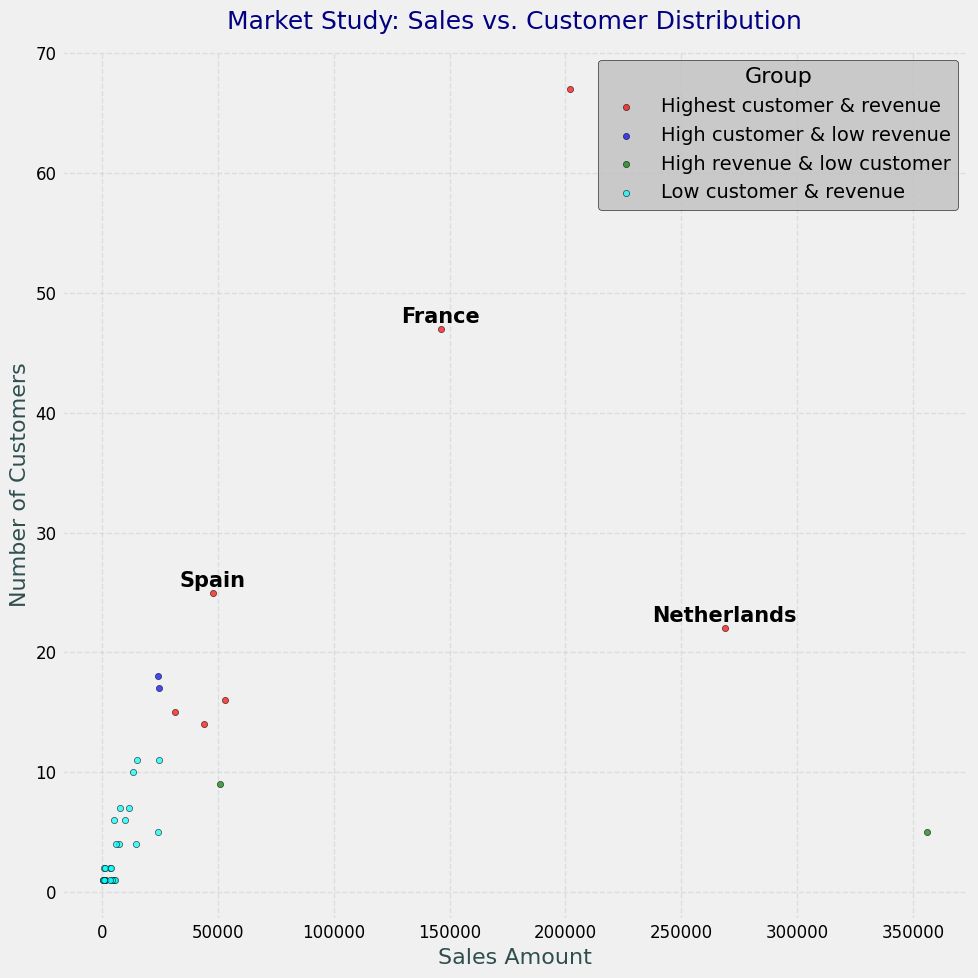

In [5]:
plt.style.use('fivethirtyeight')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each group
groups = [
    (1, 'Highest customer & revenue', 'red'),
    (2, 'High customer & low revenue', 'blue'),
    (3, 'High revenue & low customer', 'green'),
    (4, 'Low customer & revenue', 'cyan')
]

for group_num, label, color in groups:
    subset = market_study_df[market_study_df['Group'] == group_num]
    ax.scatter(subset['SalesAmount'], subset['CustomerCount'], s=20, color=color, label=label, alpha=0.7, edgecolors='black')

# Customize chart
ax.set_xlabel('Sales Amount', fontsize=16, color='darkslategray')
ax.set_ylabel('Number of Customers', fontsize=16, color='darkslategray')
ax.set_title('Market Study: Sales vs. Customer Distribution', fontsize=18, color='navy', pad=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.tick_params(axis='both', labelsize=12)

# Add legend
ax.legend(title='Group', title_fontsize=16, fontsize=14, frameon=True, facecolor='silver', edgecolor='black', loc='upper right')

# Annotate specific countries
countries_to_label = ['France', 'Spain', 'Netherlands']
for country in countries_to_label:
    country_data = market_study_df[market_study_df['Country'] == country]
    if not country_data.empty:
        x, y = country_data['SalesAmount'].iloc[0], country_data['CustomerCount'].iloc[0]
        ax.annotate(country, (x, y + 0.5), fontsize=15, ha='center', color='black', fontweight='bold')

plt.tight_layout()
logger.info("Scatter plot for market study generated.")
plt.savefig('market_study_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 6: Prepare Submission

Save the figure and notebook, then compress them into `result.zip` for submission.

In [ ]:
import zipfile
import joblib

# Save figure
joblib.dump(fig, 'market_study_fig')

# Compress files
file_names = ['market_study_fig', 'final_project_3_market_study.ipynb']
with zipfile.ZipFile('result.zip', 'w', compression=zipfile.ZIP_DEFLATED) as zf:
    for file in file_names:
        zf.write(file)
logger.info("Submission files compressed into 'result.zip'")